# EDA - Decline Data 

### Imports

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
color = sns.color_palette()

### Reading each CSV in a separate dataframe

In [2]:
#direct = os.path.dirname(os.getcwd()) 
newpathdeclineloanFinal = '/Users/madhu/Desktop/ADS Project/Dataset/Decline'
d1 = pd.read_csv(newpathdeclineloanFinal+'/RejectStatsA.csv', header=1, skipfooter=4, engine='python')
d2 = pd.read_csv(newpathdeclineloanFinal+'/RejectStatsB.csv', header=1, skipfooter=4, engine='python')
d3 = pd.read_csv(newpathdeclineloanFinal+'/RejectStatsD.csv', header=1, skipfooter=4, engine='python')
d4 = pd.read_csv(newpathdeclineloanFinal+'/RejectStats_2016Q1.csv', header=1, skipfooter=4, engine='python')
d5 = pd.read_csv(newpathdeclineloanFinal+'/RejectStats_2016Q2.csv', header=1, skipfooter=4, engine='python')
d6 = pd.read_csv(newpathdeclineloanFinal+'/RejectStats_2016Q3.csv', header=1, skipfooter=4, engine='python')
d7 = pd.read_csv(newpathdeclineloanFinal+'/RejectStats_2016Q4.csv', header=1, skipfooter=4, engine='python')
d8 = pd.read_csv(newpathdeclineloanFinal+'/RejectStats_2017Q1.csv', header=1, skipfooter=4, engine='python')
d9 = pd.read_csv(newpathdeclineloanFinal+'/RejectStats_2017Q2.csv', header=1, skipfooter=4, engine='python')
d10 = pd.read_csv(newpathdeclineloanFinal+'/RejectStats_2017Q3.csv', header=1, skipfooter=4, engine='python')

### Concatenating all the CSVs in one dataframe

In [3]:
decline_data = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10])

In [4]:
decline_data.shape

(16131432, 9)

### Finding the missing data percentage and storing columns in features with mores than 70% data

In [5]:
missing_data = decline_data.isnull().sum().to_frame(name='Missing_Count').reset_index()
missing_data['Missing_percent'] = (missing_data['Missing_Count']/decline_data.shape[0])*100
missing_data.head()
missing_data = missing_data.sort_values(by='Missing_percent', axis=0, ascending=True)
features = missing_data['index'][(missing_data.Missing_percent <30)]
len(features)

8

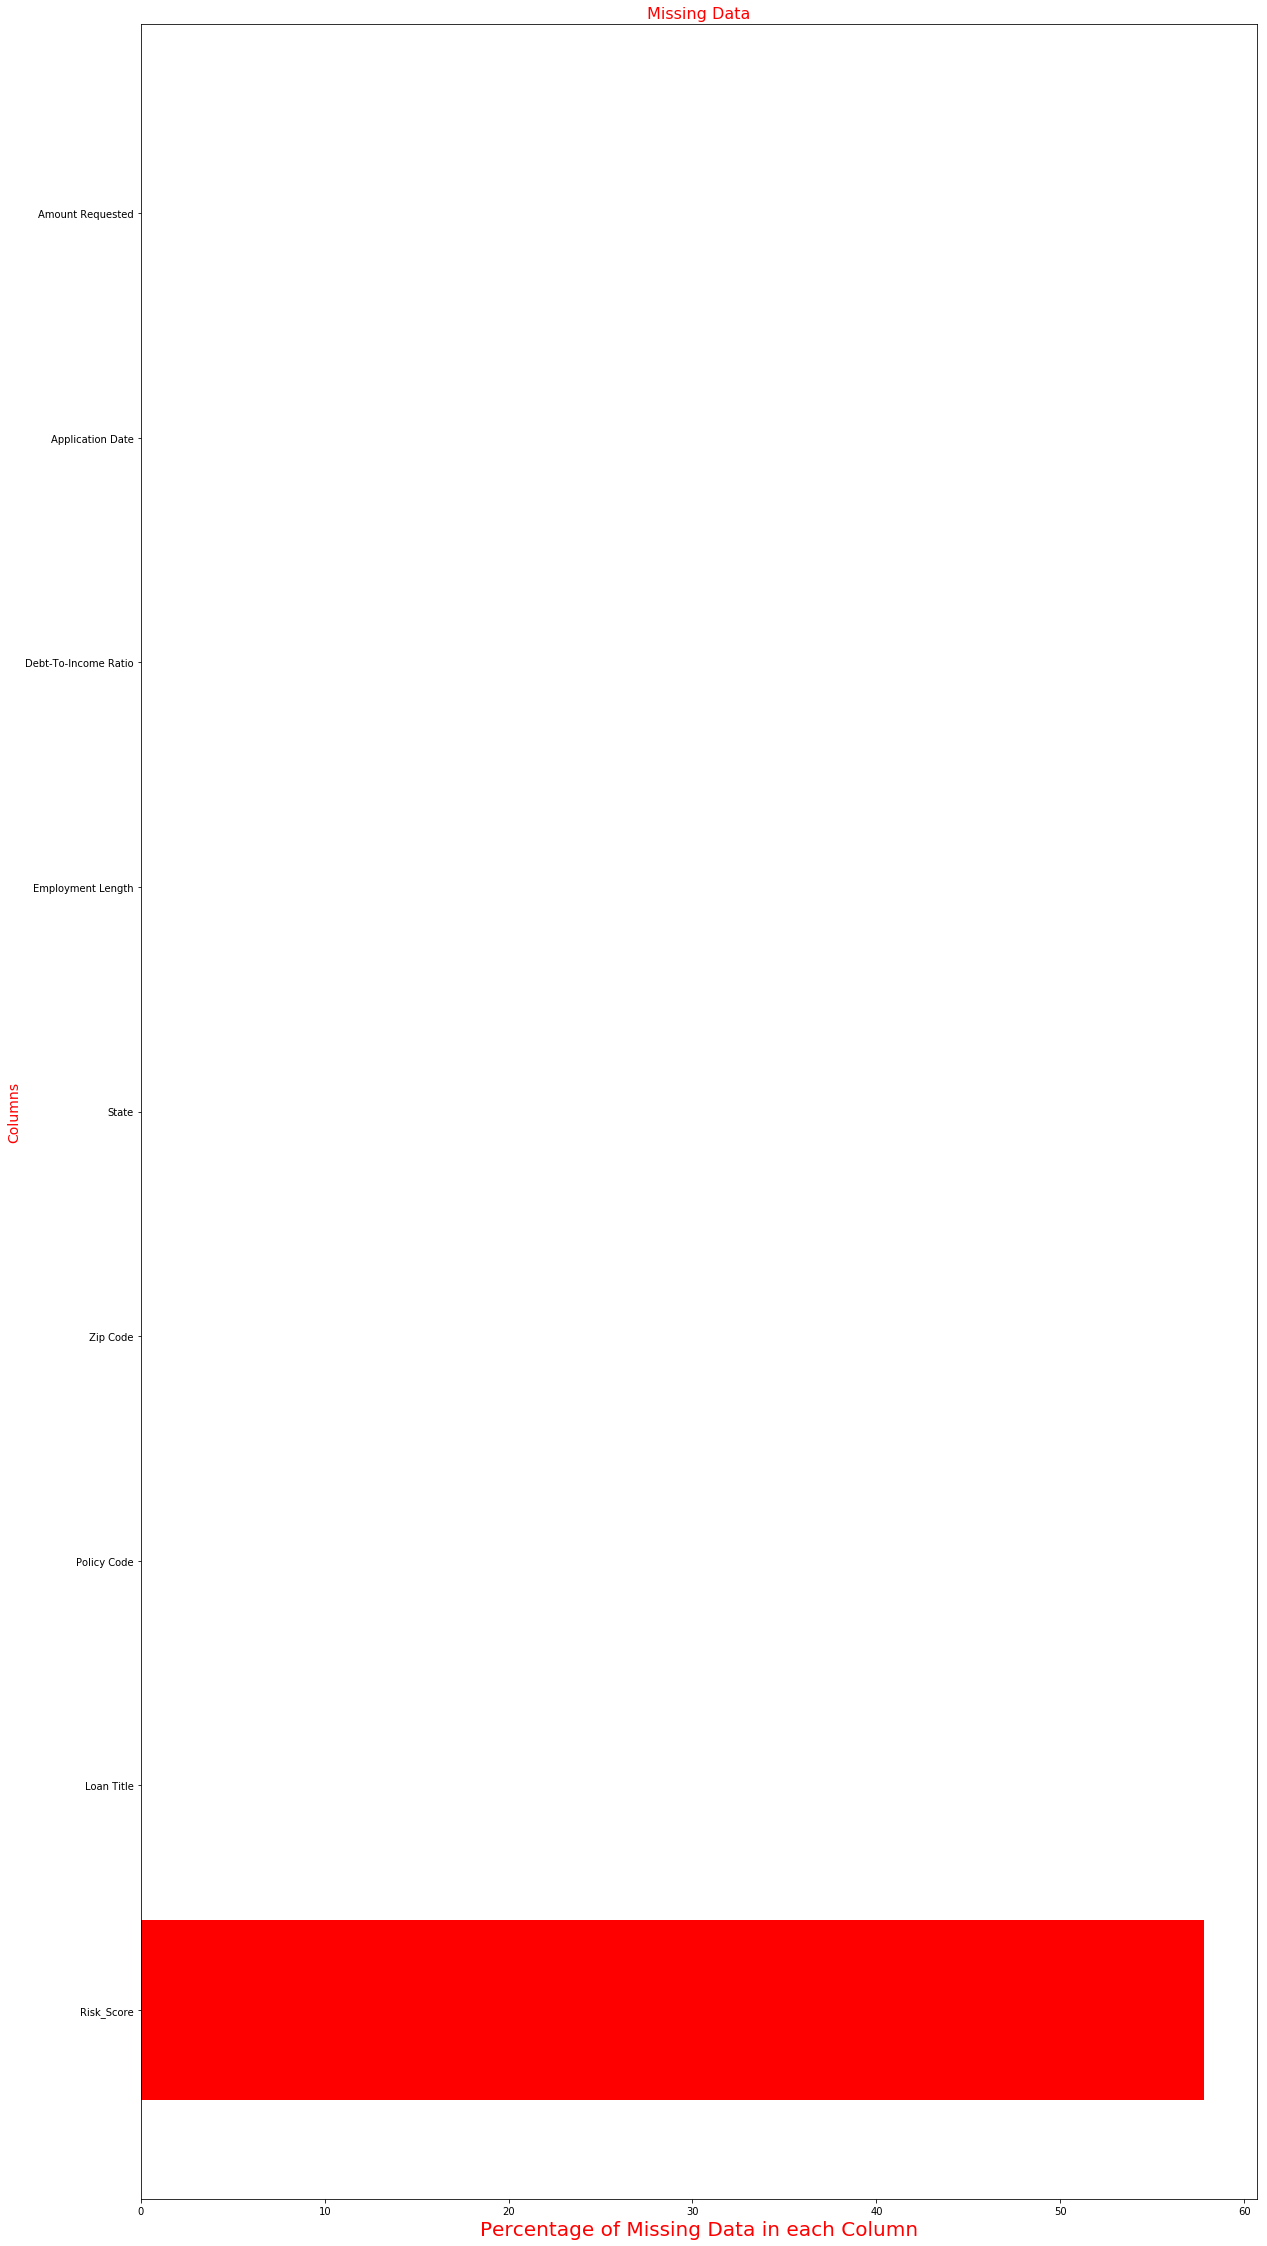

In [6]:
fig, ax = plt.subplots(figsize=(20,40))
ax.barh(range(decline_data.shape[1]), missing_data.Missing_percent.values, align='center',color='Red')

ax.set_yticks(range(decline_data.shape[1]))
ax.set_yticklabels(missing_data['index'].values,rotation =0,linespacing =20, fontsize =10)
ax.invert_yaxis()  

ax.set_xlabel('Percentage of Missing Data in each Column',fontsize=20, color='red')
ax.set_ylabel('Columns',fontsize=14, color='red')
ax.set_title('Missing Data',fontsize=16, color='red')

plt.show()

In [7]:
s = decline_data.reset_index()
s['index'] = s.index +1
s=s.rename(columns = {'index':'Id'})

In [8]:
decline_data.columns

Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code'],
      dtype='object')

In [9]:
f = ['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code']
df = s[f]
df['Month'] = df['Application Date'].astype(str).map(lambda x: x.split('-')[0])

# Discription of each Column

In [10]:
decline_data['Amount Requested'].describe()

count    1.613143e+07
mean     1.327537e+04
std      1.584008e+04
min      0.000000e+00
25%      4.200000e+03
50%      1.000000e+04
75%      2.000000e+04
max      1.400000e+06
Name: Amount Requested, dtype: float64

In [11]:
decline_data['Loan Title'].describe()

count               16130137
unique                 73929
top       debt_consolidation
freq                 5809883
Name: Loan Title, dtype: object

In [12]:
decline_data['Debt-To-Income Ratio'].describe()

count     16131432
unique       97768
top            -1%
freq       1106449
Name: Debt-To-Income Ratio, dtype: object

In [13]:
decline_data['Zip Code'].describe()

count     16131139
unique        1001
top          112xx
freq        161823
Name: Zip Code, dtype: object

In [14]:
decline_data['Employment Length'].describe()

count     16131432
unique          12
top       < 1 year
freq      12479825
Name: Employment Length, dtype: object

In [15]:
decline_data['Policy Code'].describe()

count    1.613051e+07
mean     5.593126e-03
std      1.056171e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.000000e+00
Name: Policy Code, dtype: float64

## Risk Score Distribution

In [16]:
decline_data["Risk_Score"].describe()

count    6.807839e+06
mean     6.263678e+02
std      9.728839e+01
min      0.000000e+00
25%      5.910000e+02
50%      6.380000e+02
75%      6.760000e+02
max      9.900000e+02
Name: Risk_Score, dtype: float64

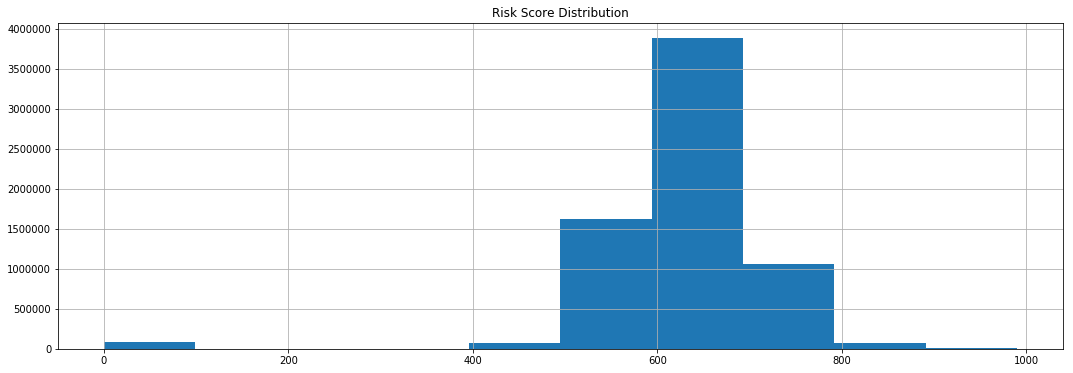

In [17]:
plt.rc("figure", figsize=(18, 6))
decline_data["Risk_Score"].hist()
plt.title("Risk Score Distribution")
plt.show()

# Risk Score vs State and Employee length

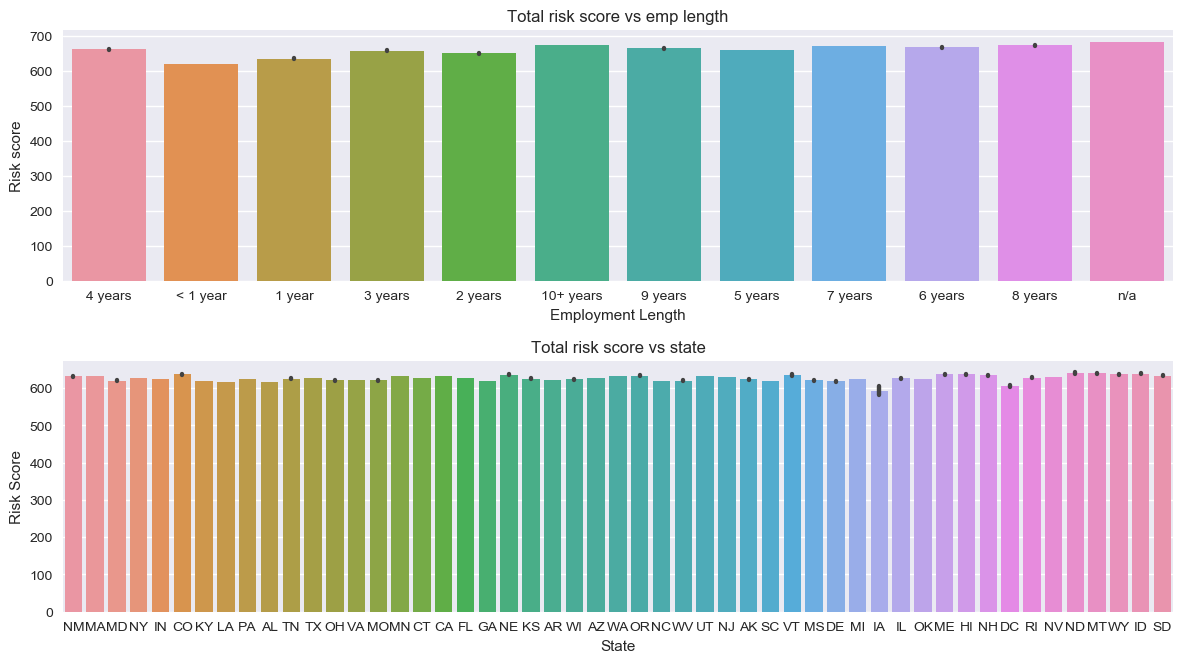

In [18]:
fig  = plt.figure(figsize=(12, 13), dpi=100);
sns.set(font_scale = 1)
axes1 = fig.add_subplot(411) 
axes2 = fig.add_subplot(412) 

ax1 = sns.barplot(x='Employment Length', y='Risk_Score', data=decline_data,ax=axes1);
ax1.set(ylabel = 'Risk score', title = 'Total risk score vs emp length')

ax2 = sns.barplot(x='State', y='Risk_Score', data=decline_data,ax=axes2);
ax2.set(ylabel = 'Risk Score', title = 'Total risk score vs state')

fig.tight_layout()
plt.show()

# Numerical Data Distribution

In [19]:
decline_data['Debt-To-Income Ratio'] = decline_data['Debt-To-Income Ratio'].astype(str).map(lambda x: x.rstrip('%'))
decline_data['Debt-To-Income Ratio'] = decline_data['Debt-To-Income Ratio'].astype(float)

In [20]:
decline_data['Employment Length']=np.where(decline_data['Employment Length']=='10+ years','10',decline_data['Employment Length'])
decline_data['Employment Length']=np.where(decline_data['Employment Length']=='< 1 year','0',decline_data['Employment Length'])
decline_data['Employment Length']=np.where(decline_data['Employment Length']=='1 year','1',decline_data['Employment Length'])
decline_data['Employment Length'] = decline_data['Employment Length'].map(lambda x: x.rstrip('years'))
decline_data['Employment Length'] = decline_data['Employment Length'].map(lambda x: x.strip())
decline_data.loc[decline_data['Employment Length']=='n/',['Employment Length']]=0
decline_data['Employment Length']= decline_data['Employment Length'].astype(np.int64)

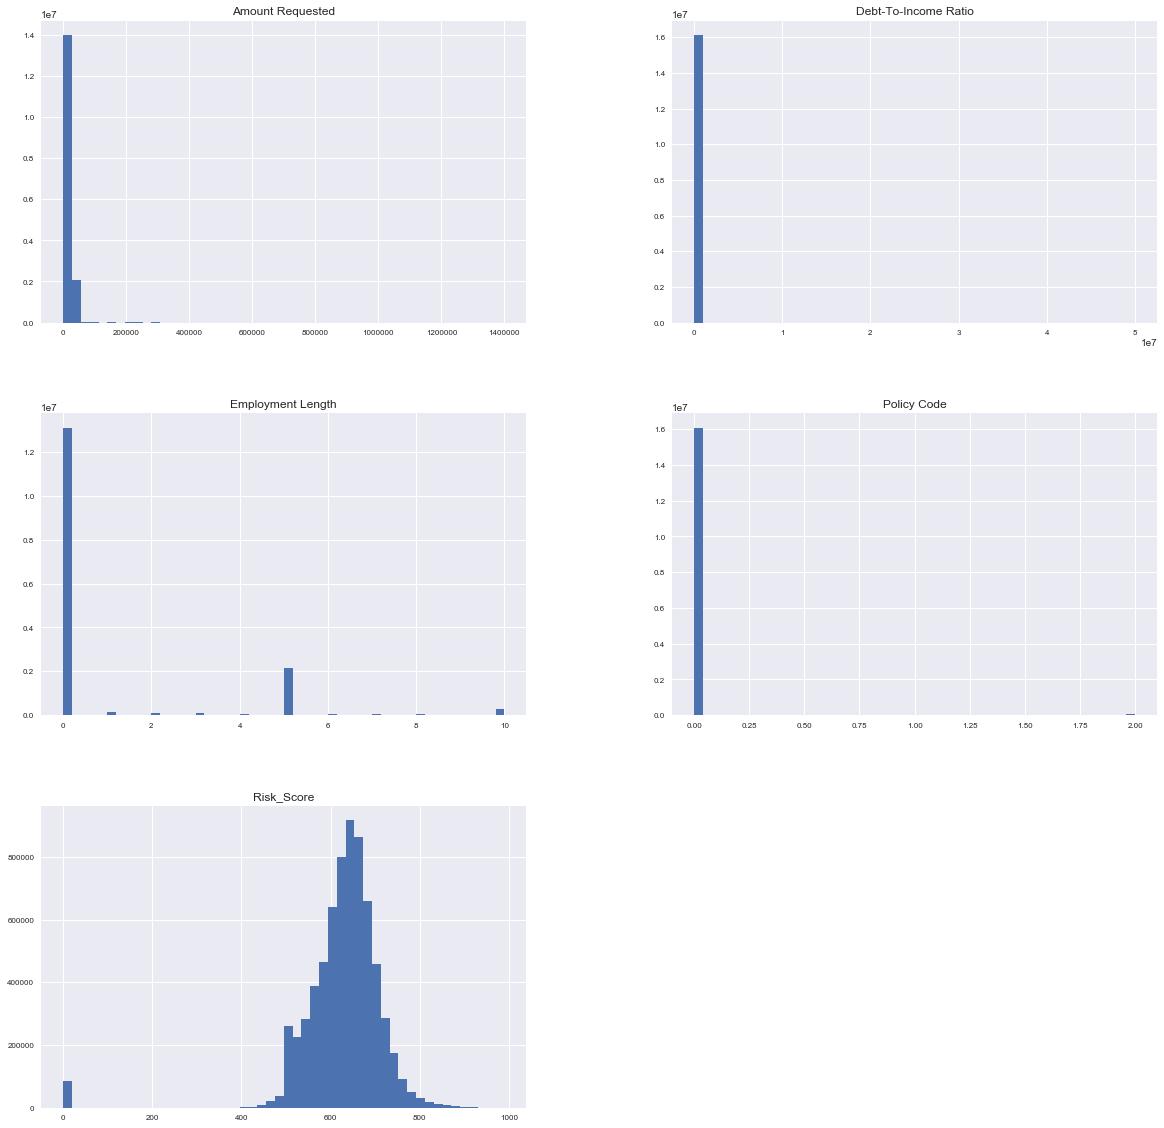

In [21]:
numcols = decline_data[['Amount Requested', 'Risk_Score', 'Policy Code', 'Debt-To-Income Ratio', 'Employment Length']]
numcols.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

## Loan Title

In [22]:
decline_data['Loan Title'].unique()

array(['Wedding Covered but No Honeymoon', 'Consolidating Debt',
       'Want to consolidate my debt', ..., 'dougie03', 'freeup',
       'Business Advertising Loan'], dtype=object)

The text in the document by SHREYANTH REDDY BEZAWADA is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/

Copyright 2018 SHREYANTH REDDY BEZAWADA AND ADITYA MOHAN KUMAR

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.